In [9]:
from equity import rsi_new, backtest
import pandas as pd

price = pd.read_csv("equity/us_equity_close.csv", index_col="DATE", parse_dates=["DATE"])
weight = rsi_new.simulate(price)

book, nav = backtest.calculate_nav(price=price, weight=weight)



In [10]:
merge = pd.concat(nav.values(), axis=1)
merge.columns = nav.keys()
merge = merge.fillna(method='ffill')
merge

,strategy_1,strategy_2,strategy_3
Date,,,
2000-12-01,1000.000000,1000.000000,1000.000000
2000-12-04,1014.375619,1014.375619,1014.375619
2000-12-05,1006.689835,1006.689835,1006.689835
2000-12-06,1002.795884,1002.795884,1002.795884
2000-12-07,1040.462703,1040.462703,1040.462703
...,...,...,...
2023-07-25,7196.374691,7196.374691,7196.374691
2023-07-26,7219.306280,7219.306280,7219.306280
2023-07-27,7077.168295,7077.168295,7077.168295


╒═══════════════════════════╤══════════════╤══════════════╤══════════════╕
│ Metrics                   │   strategy_1 │   strategy_2 │   strategy_3 │
╞═══════════════════════════╪══════════════╪══════════════╪══════════════╡
│ Annualized Returns        │    0.0814212 │    0.0814212 │    0.0814212 │
├───────────────────────────┼──────────────┼──────────────┼──────────────┤
│ Annualized Volatilities   │    0.361611  │    0.361611  │    0.361611  │
├───────────────────────────┼──────────────┼──────────────┼──────────────┤
│ Sharpe Ratios             │    0.225162  │    0.225162  │    0.225162  │
├───────────────────────────┼──────────────┼──────────────┼──────────────┤
│ Max DrawDowns             │   -0.590311  │   -0.590311  │   -0.590311  │
├───────────────────────────┼──────────────┼──────────────┼──────────────┤
│ Skewness                  │    0.0921238 │    0.0921238 │    0.0921238 │
├───────────────────────────┼──────────────┼──────────────┼──────────────┤
│ Kurtosis               

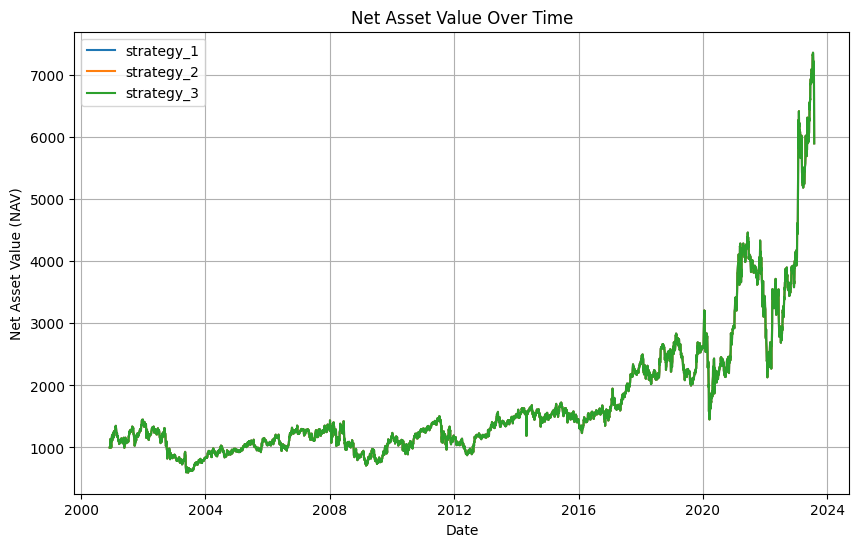

In [11]:
backtest.result_metrics(nav=merge)

In [1]:
from equity import rsi_new, backtest
import pandas as pd

price = pd.read_csv("equity/price_etf_equity_us.csv", index_col="DATE", parse_dates=["DATE"])
weight = rsi_new.simulate(price)

book, nav = backtest.calculate_nav(price=price, weight=weight)
nav.to_clipboard()

                  FRI        ICF        REZ      SCHH
DATE                                                 
2013-07-31  19.192125  41.963104  53.114438  16.47878
                  DFJ        DIM        DLS        EFA       EFAV        EFG  \
DATE                                                                           
2013-08-30  47.708641  54.488143  57.789933  59.897057  57.798072  64.203341   

                  EWD        EWN       EWP        EWQ  ...        FEZ  \
DATE                                                   ...              
2013-08-30  32.688759  22.734197  30.40056  25.058163  ...  35.692487   

                 GWX       IEFA        IEV       QABA        SCJ       TLTD  \
DATE                                                                          
2013-08-30  26.30847  53.906987  41.415754  30.542721  49.762299  57.235807   

                  TOK        VEA        VGK  
DATE                                         
2013-08-30  46.989912  38.388599  53.109206  



In [10]:
import yfinance as yf
import pandas as pd

data = pd.read_csv("equity/us_equity_close.csv", index_col="DATE")
tickers = data.columns.tolist()
#tickers = [stock.replace(' US Equity', '') for stock in tickers]

data = yf.download(tickers=tickers, start="2023-06-26")["Adj Close"]
data.to_clipboard()

[*********************100%***********************]  1 of 1 completed


In [11]:
import yfinance as yf
import pandas as pd

data = pd.read_csv("equity/us_equity_close.csv", index_col="DATE")
add_price = pd.read_csv("equity/add_price.csv", index_col="Date")

add_price = add_price / add_price.iloc[0]

new = (add_price * data.iloc[-1]).round(2)
new = new.drop(index=new.index[0])
data = data.append(new)
data.index.name = "DATE"
data.index = pd.to_datetime(data.index)

data.to_csv("equity/us_equity_close.csv")

In [2]:
import pandas as pd

data = pd.read_csv("equity/us_equity_weights.csv", index_col="DATE")
data.stack().to_clipboard()

ValueError: Index DATE invalid

In [2]:
from equity import rsi_new, backtest
import pandas as pd

price = pd.read_csv("equity/us_equity_close.csv", index_col="DATE", parse_dates=["DATE"])
weight = rsi_new.rebalance(price)

weight

,ticker,weight
0,LYV,0.5
1,PAG,0.5
